# Assignment 1 Complex Systems
## by Paul Vogler, Mtr-Nr.:4979420

In [148]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Problem 1:
Using the package NetworkX for Python 3, draw the gene network with the following criteria for edges:
- (A) Draw an edge between genes X and Y if the Euclidean distance < 11
- (B) Draw an edge between genes X and Y if the correlation coefficient |r(X, Y )| > 0.75. Color the edges with positive correlation red and the edges with negative correlation blue.
- (C) Draw an edge between genes X and Y if the L1-norm < 7
- (D) Draw an edge between genes X and Y if the mutual information > 0.65. To calculate the mutual information, bin the RPKM values for each gene into 3 intervals.

### 1 Construct a matrix  from the data of the exercise sheet:

In [2]:
rpkm_matrix = [["A", 7, 9.2, 14.6, 20, 35.1], ["B", 19, 14.2, 6.6, 14.6, 18], 
                        ["C", 8.6, 7.0, 6.5, 7.3, 8.7], ["D", 6.8, 7.9, 5.5, 2.3, 2.9], ["E", 0.9, 1.8, 3.9, 4.8, 6.2]]
rpkm_matrix

[['A', 7, 9.2, 14.6, 20, 35.1],
 ['B', 19, 14.2, 6.6, 14.6, 18],
 ['C', 8.6, 7.0, 6.5, 7.3, 8.7],
 ['D', 6.8, 7.9, 5.5, 2.3, 2.9],
 ['E', 0.9, 1.8, 3.9, 4.8, 6.2]]

### 1 (A) Draw an edge between genes X and Y if the Euclidean distance < 11:

In [3]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

Euclidean Distances:
A - B : 23.54930996865938
A - C : 30.51655288527851
A - D : 37.877037898969874
A - E : 35.6750613173965
B - C : 17.31444483660969
B - D : 23.854559312634557
B - E : 26.906133129827484
C - D : 7.980601481091509
C - E : 10.275699489572474
D - E : 9.577055915050304


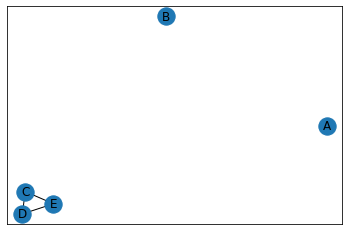

In [4]:
A = nx.Graph()
for gene in rpkm_matrix:
    A.add_node(gene[0])
print("Euclidean Distances:")
for i in range(len(rpkm_matrix)):
    for j in range(i+1, len(rpkm_matrix)):
        label_1 = rpkm_matrix[i][0]
        label_2 = rpkm_matrix[j][0]
        data_1 = np.array(rpkm_matrix[i][1:])
        data_2 = np.array(rpkm_matrix[j][1:])
        print(label_1, "-", label_2, ":", euclidean_distance(data_1, data_2))
        if euclidean_distance(data_1, data_2) < 11:
            A.add_edge(label_1, label_2)
nx.draw_networkx(A)
plt.show()

### 1 (B) Draw an edge between genes X and Y if the correlation coefficient |r(X, Y)| > 0.75. Color the edges with positive correlation red and the edges with negative correlation blue.

In [5]:
def sample_correlation(x, y):
    return (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.sqrt(np.mean(x**2)-np.mean(x)**2) * np.sqrt(np.mean(y**2)-np.mean(y)**2))

Correlation coefficients:
A - B : 0.18282164628649436
A - C : 0.36979349454103805
A - D : -0.8082141771478251
A - E : 0.9365791829329874
B - C : 0.8968154506323474
B - D : -0.09154760671741063
B - E : -0.11285372096379764
C - D : -0.20926224800854257
C - E : 0.06545618513053815
D - E : -0.8838215830121594


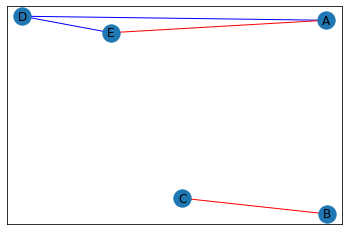

In [6]:
B = nx.Graph()
for gene in rpkm_matrix:
    B.add_node(gene[0])
print("Correlation coefficients:")
for i in range(len(rpkm_matrix)):
    for j in range(i+1, len(rpkm_matrix)):
        label_1 = rpkm_matrix[i][0]
        label_2 = rpkm_matrix[j][0]
        data_1 = np.array(rpkm_matrix[i][1:])
        data_2 = np.array(rpkm_matrix[j][1:])
        print(label_1, "-", label_2, ":", sample_correlation(data_1, data_2))
        if sample_correlation(data_1, data_2) > 0.75:
            B.add_edge(label_1, label_2, color='r')
        elif sample_correlation(data_1, data_2) < -0.75:
            B.add_edge(label_1, label_2, color='b')
colors = nx.get_edge_attributes(B,'color').values()
nx.draw_networkx(B, edge_color=colors)
plt.show()

### 1 (C) Draw an edge between genes X and Y if the L1-norm < 7:

In [7]:
def l1_norm(x, y):
    return np.sum(np.abs(x-y)) / len(x)

L1 norm:
A - B : 9.5
A - C : 10.2
A - D : 12.1
A - E : 13.66
B - C : 6.860000000000001
B - D : 9.4
B - E : 10.959999999999999
C - D : 2.8999999999999995
C - E : 4.1
D - E : 3.8800000000000003


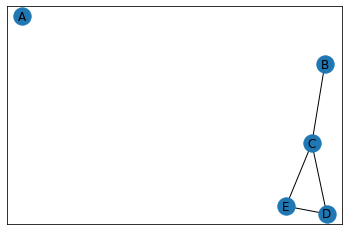

In [8]:
C = nx.Graph()
for gene in rpkm_matrix:
    C.add_node(gene[0])
print("L1 norm:")
for i in range(len(rpkm_matrix)):
    for j in range(i+1, len(rpkm_matrix)):
        label_1 = rpkm_matrix[i][0]
        label_2 = rpkm_matrix[j][0]
        data_1 = np.array(rpkm_matrix[i][1:])
        data_2 = np.array(rpkm_matrix[j][1:])
        print(label_1, "-", label_2, ":", l1_norm(data_1, data_2))
        if l1_norm(data_1, data_2) < 7:
            C.add_edge(label_1, label_2)
nx.draw_networkx(C)
plt.show()

### 1 (D) Draw an edge between genes X and Y if the mutual information > 0.65:

In [82]:
def mutual_information(x, y):
    hist_x, edges_x = np.histogram(x, bins=3, density=False)
    hist_y, edges_y = np.histogram(y, bins=3, density=False)
    hist_xy, edges_xy1, edges_xy2 = np.histogram2d(x, y, bins=3, density=False)
    list_x = []
    hist_x, hist_y, hist_xy = hist_x / 5, hist_y / 5, hist_xy / 5
    for i in range(len(hist_x)):
        list_y = []
        for j in range(len(hist_y)):
            if hist_xy[i][j] == 0: #<- to avoid the nans when dividing by hist_x[i]*hist_y[j] = 0
                list_y.append(0)
            else:
                list_y.append(hist_xy[i][j]*np.log(hist_xy[i][j] / (hist_x[i]*hist_y[j])))
        list_x.append(np.sum(list_y))
    return np.sum(list_x)

Mutual Information:
A - B : 0.39575279478527825
A - C : 0.6730116670092564
A - D : 0.6730116670092564
A - E : 0.6730116670092564
B - C : 0.7776612957621658
B - D : 0.5004024235381878
B - E : 0.5004024235381878
C - D : 0.5004024235381878
C - E : 0.5004024235381878
D - E : 1.054920167986144


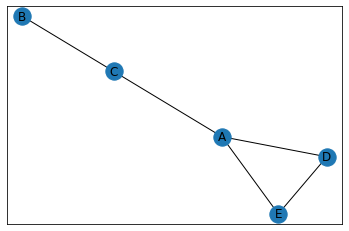

In [83]:
D = nx.Graph()
for gene in rpkm_matrix:
    D.add_node(gene[0])
print("Mutual Information:")
for i in range(len(rpkm_matrix)):
    for j in range(i+1, len(rpkm_matrix)):
        label_1 = rpkm_matrix[i][0]
        label_2 = rpkm_matrix[j][0]
        data_1 = np.array(rpkm_matrix[i][1:])
        data_2 = np.array(rpkm_matrix[j][1:])
        print(label_1, "-", label_2, ":", mutual_information(data_1, data_2))
        if mutual_information(data_1, data_2) > 0.65:
            D.add_edge(label_1, label_2)
nx.draw_networkx(D)
plt.show()

# Problem 2
Consider two random variables X and Y from which we drew the following samples:

In [15]:
samples_x = (0.3, 0.98, 0.54, 0.49, 0.39, 0.14, 0.03, 0.81, 0.65, 0.18)
samples_y = (0.74, 0.09, 0.48, 0.15, 0.71, 0.8, 0.53, 0.95, 0.63, 0.88)

Therefore the first observation is (x = 0.3, y = 0.74) and so on (10 observations in total).
First, bin the data by dividing the interval of [0, 1] into 4 equally wide sub-intervals. 

In [40]:
hist_xy, edges_xy1, edges_xy2 = np.histogram2d(samples_y, samples_x, bins=4, range=[[0,1],[0,1]], density=False)
hist_xy

array([[0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 0., 0., 1.]])

In [84]:
edges_xy1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [85]:
# normalize
hist_xy /10

array([[0. , 0.1, 0. , 0.1],
       [0. , 0. , 0.1, 0. ],
       [0.1, 0.2, 0.1, 0. ],
       [0.2, 0. , 0. , 0.1]])

The rest is then in the Word Sheet

# Problem 3

## (A)
Generate a random network G(n = 150, p = 0.08) according to Erdős-Rényi model where n is the number of nodes and p is the probability of including an edge in the graph (remember to set a random seed, mention it in your report). Analyze your network: calculate the number and size of connected components, plot histograms for the degree
values, closeness and betweenness centralities. Normalize the degree histogram and on
top of it plot the theoretically appropriate Poisson probability mass function (you may
use scipy.stats.poisson). Compare the two. Export the network as GraphML file and the
node attributes (centralities, degree) as a csv file. Check what happens when you change
the value of p (you do not need to hand in the results for other values of p).

### (A) 1 Generate a random network G(n = 150, p = 0.08) according to Erdős-Rényi model

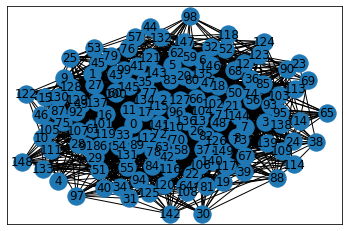

In [176]:
G = nx.Graph()
n = 150
p = 0.08
np.random.seed(42)
G.add_nodes_from(range(n))
for i in range(n):
    for j in range(n):
        rand_val = np.random.rand()
        if rand_val < p:
            G.add_edge(i, j)
nx.draw_networkx(G)
plt.show()

### (A) 2 Analysis of the Network:

In [177]:
print("Number of connected Components:", len(list(nx.connected_components(G))))
print("With sizes:")
for i, entry in enumerate(list(nx.connected_components(G))):
    print("\tComponent:",i,"Size:",len(entry))

Number of connected Components: 1
With sizes:
	Component: 0 Size: 150


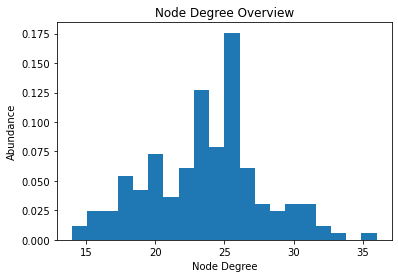

In [178]:
plt.hist([d for n, d in G.degree()], density=True, bins=20)
plt.ylabel('Abundance')
plt.xlabel('Node Degree');
plt.title('Node Degree Overview')
plt.show()

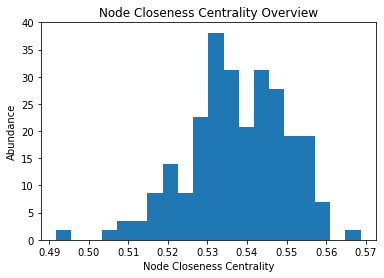

In [179]:
plt.hist(nx.algorithms.centrality.closeness_centrality(G).values(), density=True, bins=20)
plt.ylabel('Abundance')
plt.xlabel('Node Closeness Centrality');
plt.title('Node Closeness Centrality Overview')
plt.show()

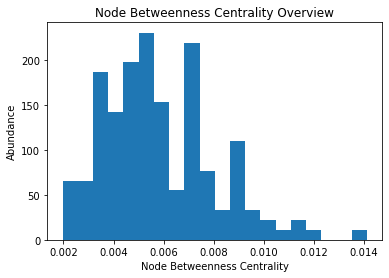

In [180]:
plt.hist(nx.algorithms.centrality.betweenness_centrality(G).values(), density=True, bins=20)
plt.ylabel('Abundance')
plt.xlabel('Node Betweenness Centrality');
plt.title('Node Betweenness Centrality Overview')
plt.show()

### (A) 3 Normalize the degree histogram and on top of it plot the theoretically appropriate Poisson probability mass function:

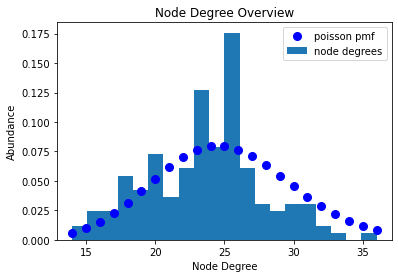

In [181]:
plt.hist([d for n, d in G.degree()], density=True, bins=20, label='node degrees')
plt.ylabel('Abundance')
plt.xlabel('Node Degree');
plt.title('Node Degree Overview')
mu = 25
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.legend()
plt.show()

Except for some variability of the histogram, the poisson probability mass function does closely resemble the node degree value distribution.

### (A) 4 Export the network as GraphML file and the node attributes (centralities, degree) as a csv file.

In [182]:
nx.readwrite.graphml.write_graphml(G, "erdos_renyi_graph.graphml")
df = pd.DataFrame()
df.index.name = 'Node_ID'
df["degrees"] = [d for n, d in G.degree()]
df["betweenness_centrality"] = nx.algorithms.centrality.betweenness_centrality(G).values()
df["closeness_centrality"] = nx.algorithms.centrality.closeness_centrality(G).values()
df.to_csv("erdos_renyi_graph_data.csv", header=True)

### (A) 5 Check what happens when you change the value of p (you do not need to hand in the results for other values of p).

- For smaller p, there typically stays one large connected component and a bunch of unconnected nodes or clusters of size 2, also the closeness centrality increases for most nodes and the betweeness centrality gets a lot smaller overall 
- for larger p there is only one connected component and all centrality scores look very normally distributed

## (Bonus)
Use the package NetworkX to generate a random network G(n = 150, m = 3) according to
the Barabási-Albert model where n is the number of nodes and m is the number of edges
to attach from a new node to existing nodes. Plot the normalized degree histogram and
compare it to the histograms of the Erdős-Rényi model and E. coli interactome graph.
What do you notice?